# Import the Necessary Libraries

In [3]:
import pandas as pd
import os

# Read the Sales_Data Files

In [4]:
#Reading a Particular Month Data
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


# Show All The Files From That Sales_Data Directory

In [6]:
# create a list of files from that directory
files_data = [files for files in os.listdir("./Sales_Data" ) ]

# now read all the files through the iterable
for files in files_data :
    print(files)

Sales_November_2019.csv
Sales_October_2019.csv
Sales_July_2019.csv
Sales_August_2019.csv
Sales_January_2019.csv
Sales_June_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_April_2019.csv
Sales_September_2019.csv
Sales_May_2019.csv
Sales_March_2019.csv


# Merge all the files into single CSV File

In [7]:
# create a empty DataFrame Object
all_months_data = pd.DataFrame()

# then loop through the files and add the files to the empty DataFrame Object
for files in files_data :
    #one by one read through the files and add it to single DataFrame 
    df = pd.read_csv("./Sales_Data/" + files)
    #then concate the DataFrame with the Empty DataFrame 
    all_months_data = pd.concat([all_months_data, df])


#creating a new csv file name all_months_data.csv
all_months_data.to_csv("./all_months_data.csv", index = False)    



# Read the All_Months_Data File

In [8]:
try :
    
    all_data = pd.read_csv("./all_months_data.csv")
    print("Exception Pass Sucessfully")    
except Exception as e :
    print(e)


Exception Pass Sucessfully


In [9]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...
186845,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016"
186846,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016"
186847,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001"
186848,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016"


# Add Month Column to The File

In [10]:
#we get the month simply from 'Order Date' column and take first two string from that
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month']

0         11
1         11
2         11
3         11
4         11
          ..
186845    03
186846    03
186847    03
186848    03
186849    03
Name: Month, Length: 186850, dtype: object

In [11]:
### Make the 'Month' to a numeric data
try :
    all_data['Month'] = all_data['Month'].astype('int32')
    all_data.head()
except Exception as e :
    print(e)

cannot convert float NaN to integer


# We need to Clean Up the Data(Data Cleaning)

### Process-1 . Search The Data Where Which has NaN Values

In [12]:
non_val = all_data[all_data.isna().any(axis = 1)]
non_val

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
544,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
184566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185527,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Process-2.  Drop the Data Which has NaN Values


In [13]:
# dropping all the rows which has NaN Values
all_data = all_data.dropna(how = 'all')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11
...,...,...,...,...,...,...,...
186845,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",03
186846,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",03
186847,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",03
186848,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",03


### Process- 3.  Now Make the Conversion 'Month' to numeric type

In [14]:
### Make the 'Month' to a numeric data
try :
    all_data['Month'] = all_data['Month'].astype('int32')
    all_data.head()
except Exception as e :
    print(e)
    # this is because we might have some data which contains string type data 'Or'
    

invalid literal for int() with base 10: 'Or'


### Process- 4. Filter the Data Where The Value is 'Or'(String type obj)

In [15]:
temp_data=all_data[all_data['Order Date'].str[0:2]=='Or']
temp_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1172,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1620,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1726,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1891,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185105,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185397,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185857,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186040,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


### Process - 5. Remove the Data Where the value is 'Or'

In [16]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11
...,...,...,...,...,...,...,...
186845,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",03
186846,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",03
186847,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",03
186848,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",03


### Process- 6. Now Make The Conversion Again 'Month' column to numeric type

In [19]:
try :
    all_data = all_data[all_data['Order Date'].str[0:2]].astype('int32')
    print("Passed The Exception, Data is Converted")
except Exception as e :
    print(e)

"None of [Index(['11', '11', '11', '11', '11', '11', '11', '11', '11', '11',\n       ...\n       '03', '03', '03', '03', '03', '03', '03', '03', '03', '03'],\n      dtype='object', length=185950)] are in the [columns]"


In [20]:
all_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11
...,...,...,...,...,...,...,...
186845,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",03
186846,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",03
186847,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",03
186848,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",03


# Task-1. What was the best month for sales? 

In [21]:
# We can get the doing 'Quantity Order' * Price Each
try :
    all_data['Sales'] = all_data.iloc[2] * all_data.iloc[3]
    all_data
except Exception as e :
    print(e)
    

can't multiply sequence by non-int of type 'str'


### We again need to Clean Up Data(Data Cleaning)

### Process- 1. Convert Both The columns 'Quantity Ordered' & 'Price Each' to numeric type

In [22]:
# Qurantity Ordered Data to be numeric type
# Use Pandas function to_numeric(obj) to do so
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


<ipython-input-22-8562d82a40c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
<ipython-input-22-8562d82a40c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


### Process -2. Now Make the Multiplication 


In [23]:
# We can get the doing 'Quantity Order' * Price Each
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']



<ipython-input-23-00c991a1494b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


In [24]:
### Best Month For Sales
month_sales = all_data.groupby('Month').sum()['Sales'] # we can month 12 has the highest sales
month_sales

Month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

# Task -3 . How much was earned that month?

### Plot the Data to see the result

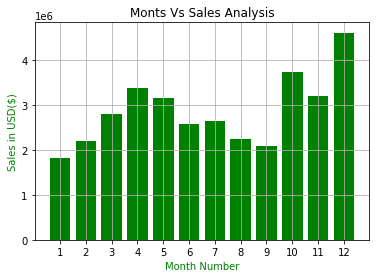

In [25]:
import matplotlib.pyplot as plt

# creates the x data which is month using range()
months = range(1, 13) # range() is inclusive so we only get 0 to 12
# create the y data which is the sales from the months or say x
result = month_sales

# we want to plot the data in Bar Chart
fig = plt.figure("Bar Chart") # naming the figure
ax = fig.subplots(1, 1, sharey = True) # we want the subplots

# now ploting the data
plt.bar(x = months, height = result, color = 'green')
plt.xticks(months) # x axis get the months no.
plt.xlabel('Month Number', color = 'green')
plt.ylabel('Sales in USD($)', color = 'green')
plt.title('Monts Vs Sales Analysis', color = 'black')
plt.grid()
plt.show()

# Task-2. Which city has the highest sales?

### Process-1 . Filter out the City now

In [29]:
# getting the City's Name
all_data['City'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1])
all_data.head(10)

<ipython-input-29-645188cff10e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston
5,278802,USB-C Charging Cable,1,11.95,11/14/19 20:34,"154 2nd St, San Francisco, CA 94016",11,11.95,San Francisco
6,278803,Lightning Charging Cable,1,14.95,11/11/19 08:05,"724 5th St, San Francisco, CA 94016",11,14.95,San Francisco
7,278804,Bose SoundSport Headphones,1,99.99,11/15/19 11:48,"866 Sunset St, Austin, TX 73301",11,99.99,Austin
8,278805,Lightning Charging Cable,1,14.95,11/27/19 11:50,"670 Elm St, San Francisco, CA 94016",11,14.95,San Francisco
9,278806,Bose SoundSport Headphones,1,99.99,11/19/19 19:12,"174 2nd St, Boston, MA 02215",11,99.99,Boston


### Process-2. Make the City's with more specified location 

In [30]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    # split on commas(,) and getting the 2nd index which the zipcode of the city
    return address.split(',')[2]

# we are getting the City's With Their ZIPCode Values
all_data['City'] = all_data['Purchase Address'].apply(lambda x : get_city(x) + " " + get_state(x))
all_data.head(10)

<ipython-input-30-0ec863e885ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City'] = all_data['Purchase Address'].apply(lambda x : get_city(x) + " " + get_state(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City NY 10001
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin TX 73301
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles CA 90001
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle WA 98101
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston MA 02215
5,278802,USB-C Charging Cable,1,11.95,11/14/19 20:34,"154 2nd St, San Francisco, CA 94016",11,11.95,San Francisco CA 94016
6,278803,Lightning Charging Cable,1,14.95,11/11/19 08:05,"724 5th St, San Francisco, CA 94016",11,14.95,San Francisco CA 94016
7,278804,Bose SoundSport Headphones,1,99.99,11/15/19 11:48,"866 Sunset St, Austin, TX 73301",11,99.99,Austin TX 73301
8,278805,Lightning Charging Cable,1,14.95,11/27/19 11:50,"670 Elm St, San Francisco, CA 94016",11,14.95,San Francisco CA 94016
9,278806,Bose SoundSport Headphones,1,99.99,11/19/19 19:12,"174 2nd St, Boston, MA 02215",11,99.99,Boston MA 02215


### Process -3. Filter the ZIPCode from the City Data 

In [31]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    # split on commas(,) and getting the 2nd index which the zipcode of the city
    return address.split(',')[2].split(' ')[1]

# we are getting the City's With Their ZIPCode Values
all_data['City'] = all_data['Purchase Address'].apply(lambda x : get_city(x) + "(" + get_state(x) + ")")
all_data.head(10)

<ipython-input-31-5476917e2021>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City'] = all_data['Purchase Address'].apply(lambda x : get_city(x) + "(" + get_state(x) + ")")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City(NY)
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin(TX)
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles(CA)
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle(WA)
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston(MA)
5,278802,USB-C Charging Cable,1,11.95,11/14/19 20:34,"154 2nd St, San Francisco, CA 94016",11,11.95,San Francisco(CA)
6,278803,Lightning Charging Cable,1,14.95,11/11/19 08:05,"724 5th St, San Francisco, CA 94016",11,14.95,San Francisco(CA)
7,278804,Bose SoundSport Headphones,1,99.99,11/15/19 11:48,"866 Sunset St, Austin, TX 73301",11,99.99,Austin(TX)
8,278805,Lightning Charging Cable,1,14.95,11/27/19 11:50,"670 Elm St, San Francisco, CA 94016",11,14.95,San Francisco(CA)
9,278806,Bose SoundSport Headphones,1,99.99,11/19/19 19:12,"174 2nd St, Boston, MA 02215",11,99.99,Boston(MA)


#  Now Calculate the Best Sales for the City's(Task-2)

In [32]:
best_sal_city = all_data.groupby('City').sum()
best_sal_city

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta(GA),16602,2779908.20,2795498.58
Austin(TX),11153,1809873.61,1819581.75
Boston(MA),22528,3637409.77,3661642.01
Dallas(TX),16730,2752627.82,2767975.40
Los Angeles(CA),33289,5421435.23,5452570.80
New York City(NY),27932,4635370.83,4664317.43
Portland(ME),2750,447189.25,449758.27
Portland(OR),11303,1860558.22,1870732.34
San Francisco(CA),50239,8211461.74,8262203.91


# Now see the Calculated result in a graph

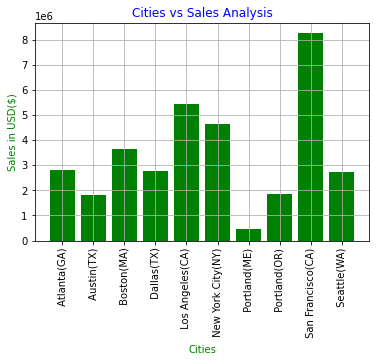

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure('Bar Chart')
ax = fig.subplots(1, 1, sharey = True)

#set the x and y values
cities = [city for city, df in all_data.groupby('City')] # x values
result = all_data.groupby('City').sum()['Sales'] # y values

# plot the data
plt.bar(x = cities, height = result, color = 'green')
plt.xticks(cities, rotation = 'vertical') # rotation = 'vertical' means cities name will rotated vertically
plt.xlabel('Cities', color = 'green')
plt.ylabel('Sales in USD($)', color = 'green')
plt.title('Cities vs Sales Analysis', color = 'blue')
plt.grid()

plt.show()


# Task-3. What time should we display advertisement to maximize likelihood of 
#              customer's buying the product?


### Process-1 . Convert the 'Order Date' to Real Datetime  Object

In [34]:
# Pandas has to_datatime(obj) to do so
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head(10)

<ipython-input-34-3d32f029a807>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,New York City(NY)
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,Austin(TX)
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles(CA)
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,Seattle(WA)
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,Boston(MA)
5,278802,USB-C Charging Cable,1,11.95,2019-11-14 20:34:00,"154 2nd St, San Francisco, CA 94016",11,11.95,San Francisco(CA)
6,278803,Lightning Charging Cable,1,14.95,2019-11-11 08:05:00,"724 5th St, San Francisco, CA 94016",11,14.95,San Francisco(CA)
7,278804,Bose SoundSport Headphones,1,99.99,2019-11-15 11:48:00,"866 Sunset St, Austin, TX 73301",11,99.99,Austin(TX)
8,278805,Lightning Charging Cable,1,14.95,2019-11-27 11:50:00,"670 Elm St, San Francisco, CA 94016",11,14.95,San Francisco(CA)
9,278806,Bose SoundSport Headphones,1,99.99,2019-11-19 19:12:00,"174 2nd St, Boston, MA 02215",11,99.99,Boston(MA)


### Process-2. Filter Out the Hours & Mins From the 'Order Data' column

In [35]:
# getting the hours
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

<ipython-input-35-538943519791>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour'] = all_data['Order Date'].dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,New York City(NY),9
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,Austin(TX),10
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles(CA),14
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,Seattle(WA),22
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,Boston(MA),13


In [36]:
# getting the minutes
all_data['Minutes'] = all_data['Order Date'].dt.minute
all_data.head()

<ipython-input-36-a24310f29cf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Minutes'] = all_data['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,New York City(NY),9,54
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,Austin(TX),10,3
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles(CA),14,56
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,Seattle(WA),22,24
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,Boston(MA),13,56


### Process-3. Calculate the no.of occurence(Orders) happens in an hourwise


In [37]:
# make a dumppy column to locate the no. of occurrences
all_data['Count'] =1
all_data.head()

<ipython-input-37-8e2fb181d099>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Count'] =1


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes,Count
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,New York City(NY),9,54,1
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,Austin(TX),10,3,1
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles(CA),14,56,1
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,Seattle(WA),22,24,1
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,Boston(MA),13,56,1


In [38]:
# getting the orders data from the in 24 hours
total_orders = all_data.groupby('Hour').count()
total_orders

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minutes,Count
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [39]:
# filter out the Order Count only in 24 hours format
no_order_by_hours = all_data.groupby('Hour').count()['Count']
no_order_by_hours

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Count, dtype: int64

# Process- 4. Plot the Data as Line Graph and also as Bar Chart

### Ploting as Line Graph

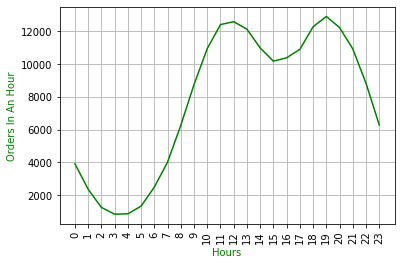

In [40]:

import matplotlib.pyplot as plt

fig = plt.figure('Line Graph')
ax = fig.subplots(1, 1, sharey = True)

# set the x and y values
hours = [hours for hours, df in all_data.groupby('Hour') ] # x data
orders = no_order_by_hours

# plot the data
plt.plot( hours, orders, color = 'green')
plt.xticks(hours, rotation= 'vertical')
plt.xlabel('Hours', color = 'green')
plt.ylabel('Orders In An Hour', color = 'green')
plt.grid(True)

plt.show()


### Ploting as Bar Chart

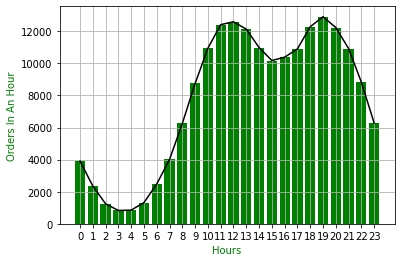

In [41]:

import matplotlib.pyplot as plt

fig = plt.figure('Bar Chart')
ax = fig.subplots(1, 1, sharey = True)

# set the x and y values
hours = [hours for hours, df in all_data.groupby('Hour') ] # x data
orders = no_order_by_hours

# plot the data
plt.bar(x = hours, height = orders, color = 'green')
plt.plot(hours,  orders, color = 'black')
plt.xticks(hours, rotation= 'horizontal')
plt.xlabel('Hours', color = 'green')
plt.ylabel('Orders In An Hour', color = 'green')
plt.grid(True)

plt.show()

# Task-4. What Products are most often sold together?

In [42]:
# copy the previous data
back_data = all_data
back_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes,Count
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,New York City(NY),9,54,1
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,Austin(TX),10,3,1
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles(CA),14,56,1
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,Seattle(WA),22,24,1
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,Boston(MA),13,56,1
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,176554,Lightning Charging Cable,1,14.95,2019-03-24 11:14:00,"672 12th St, San Francisco, CA 94016",03,14.95,San Francisco(CA),11,14,1
186846,176555,27in FHD Monitor,1,149.99,2019-03-22 20:27:00,"42 4th St, San Francisco, CA 94016",03,149.99,San Francisco(CA),20,27,1
186847,176556,AAA Batteries (4-pack),3,2.99,2019-03-14 10:29:00,"871 7th St, Los Angeles, CA 90001",03,8.97,Los Angeles(CA),10,29,1
186848,176557,iPhone,1,700.00,2019-03-30 12:32:00,"83 Washington St, San Francisco, CA 94016",03,700.00,San Francisco(CA),12,32,1


### Process- 1. Check for the Duplicate Data

In [43]:
# this will gives the ID's which have multiple orders
back_data = back_data[back_data['Order ID'].duplicated(keep = False)]
back_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes,Count
9,278806,Bose SoundSport Headphones,1,99.99,2019-11-19 19:12:00,"174 2nd St, Boston, MA 02215",11,99.99,Boston(MA),19,12,1
10,278806,ThinkPad Laptop,1,999.99,2019-11-19 19:12:00,"174 2nd St, Boston, MA 02215",11,999.99,Boston(MA),19,12,1
15,278811,Wired Headphones,1,11.99,2019-11-06 16:01:00,"99 Elm St, San Francisco, CA 94016",11,11.99,San Francisco(CA),16,1,1
16,278811,Apple Airpods Headphones,1,150.00,2019-11-06 16:01:00,"99 Elm St, San Francisco, CA 94016",11,150.00,San Francisco(CA),16,1,1
24,278819,iPhone,1,700.00,2019-11-04 06:20:00,"880 Maple St, New York City, NY 10001",11,700.00,New York City(NY),6,20,1


### Process- 2. Grouped the duplicate data in another column

In [44]:
back_data['Group_Data'] = back_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
back_data.head()

<ipython-input-44-b5a1f35455c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  back_data['Group_Data'] = back_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes,Count,Group_Data
9,278806,Bose SoundSport Headphones,1,99.99,2019-11-19 19:12:00,"174 2nd St, Boston, MA 02215",11,99.99,Boston(MA),19,12,1,"Bose SoundSport Headphones,ThinkPad Laptop"
10,278806,ThinkPad Laptop,1,999.99,2019-11-19 19:12:00,"174 2nd St, Boston, MA 02215",11,999.99,Boston(MA),19,12,1,"Bose SoundSport Headphones,ThinkPad Laptop"
15,278811,Wired Headphones,1,11.99,2019-11-06 16:01:00,"99 Elm St, San Francisco, CA 94016",11,11.99,San Francisco(CA),16,1,1,"Wired Headphones,Apple Airpods Headphones"
16,278811,Apple Airpods Headphones,1,150.00,2019-11-06 16:01:00,"99 Elm St, San Francisco, CA 94016",11,150.00,San Francisco(CA),16,1,1,"Wired Headphones,Apple Airpods Headphones"
24,278819,iPhone,1,700.00,2019-11-04 06:20:00,"880 Maple St, New York City, NY 10001",11,700.00,New York City(NY),6,20,1,"iPhone,Apple Airpods Headphones"


### Process- 3. Remove the duplicated rows now

In [45]:
back_data = back_data[['Order ID', 'Group_Data']].drop_duplicates()
back_data.head()

,Order ID,Group_Data
9,278806,"Bose SoundSport Headphones,ThinkPad Laptop"
15,278811,"Wired Headphones,Apple Airpods Headphones"
24,278819,"iPhone,Apple Airpods Headphones"
39,278833,"iPhone,Lightning Charging Cable"
47,278840,"Bose SoundSport Headphones,27in FHD Monitor"


### Process- 4. Count the pairs what occurs frequently 

In [46]:
# for that we need two more modules
from itertools import combinations
from collections import Counter

In [47]:
# Create a Counter Object
count = Counter()


In [48]:
# Now loop through the 'Grouped' and calcalte the products
for rows in back_data['Group_Data'] :
    print(rows) # this will returns a Group_Data values as an items of string type

Bose SoundSport Headphones,ThinkPad Laptop
Wired Headphones,Apple Airpods Headphones
iPhone,Apple Airpods Headphones
iPhone,Lightning Charging Cable
Bose SoundSport Headphones,27in FHD Monitor
USB-C Charging Cable,AAA Batteries (4-pack)
Apple Airpods Headphones,AAA Batteries (4-pack)
Google Phone,Bose SoundSport Headphones
iPhone,Lightning Charging Cable,Wired Headphones
Google Phone,USB-C Charging Cable
Lightning Charging Cable,Wired Headphones
Flatscreen TV,AAA Batteries (4-pack)
USB-C Charging Cable,USB-C Charging Cable
iPhone,Lightning Charging Cable
AAA Batteries (4-pack),Apple Airpods Headphones
iPhone,Apple Airpods Headphones,Wired Headphones
AA Batteries (4-pack),Wired Headphones
34in Ultrawide Monitor,Wired Headphones
Wired Headphones,Vareebadd Phone
Vareebadd Phone,USB-C Charging Cable
Google Phone,USB-C Charging Cable
27in FHD Monitor,AA Batteries (4-pack)
Apple Airpods Headphones,AAA Batteries (4-pack)
iPhone,Apple Airpods Headphones
Lightning Charging Cable,USB-C Charging 

AAA Batteries (4-pack),27in 4K Gaming Monitor
Bose SoundSport Headphones,AA Batteries (4-pack)
34in Ultrawide Monitor,Lightning Charging Cable
Apple Airpods Headphones,USB-C Charging Cable
Apple Airpods Headphones,ThinkPad Laptop
Google Phone,USB-C Charging Cable
Google Phone,Wired Headphones
AAA Batteries (4-pack),Flatscreen TV
iPhone,Wired Headphones
Vareebadd Phone,Wired Headphones
AAA Batteries (4-pack),USB-C Charging Cable
iPhone,Lightning Charging Cable
USB-C Charging Cable,27in FHD Monitor
AA Batteries (4-pack),27in 4K Gaming Monitor
iPhone,Wired Headphones
Google Phone,USB-C Charging Cable,Wired Headphones
USB-C Charging Cable,20in Monitor
Google Phone,USB-C Charging Cable
Apple Airpods Headphones,iPhone
iPhone,Lightning Charging Cable
iPhone,Lightning Charging Cable
AA Batteries (4-pack),Wired Headphones
iPhone,Lightning Charging Cable
iPhone,Wired Headphones
27in 4K Gaming Monitor,iPhone
Wired Headphones,Bose SoundSport Headphones
Lightning Charging Cable,AAA Batteries (4-pac

Google Phone,Bose SoundSport Headphones
Google Phone,Bose SoundSport Headphones,Wired Headphones
Vareebadd Phone,USB-C Charging Cable
Vareebadd Phone,USB-C Charging Cable
Wired Headphones,Lightning Charging Cable
AAA Batteries (4-pack),AA Batteries (4-pack)
27in FHD Monitor,Macbook Pro Laptop
iPhone,Lightning Charging Cable
27in 4K Gaming Monitor,USB-C Charging Cable
iPhone,Wired Headphones
Google Phone,USB-C Charging Cable
iPhone,Lightning Charging Cable
AA Batteries (4-pack),Wired Headphones
Google Phone,Bose SoundSport Headphones
AAA Batteries (4-pack),Google Phone
AAA Batteries (4-pack),27in 4K Gaming Monitor
Google Phone,USB-C Charging Cable,Bose SoundSport Headphones
iPhone,Lightning Charging Cable
Vareebadd Phone,Wired Headphones
Google Phone,Wired Headphones
Google Phone,Wired Headphones
ThinkPad Laptop,Wired Headphones
Google Phone,AA Batteries (4-pack)
ThinkPad Laptop,Lightning Charging Cable
Vareebadd Phone,USB-C Charging Cable
iPhone,Lightning Charging Cable
iPhone,Lightnin

Apple Airpods Headphones,Apple Airpods Headphones
Wired Headphones,Lightning Charging Cable
Google Phone,USB-C Charging Cable
Google Phone,USB-C Charging Cable
Apple Airpods Headphones,LG Dryer
iPhone,Lightning Charging Cable
Vareebadd Phone,USB-C Charging Cable
iPhone,Lightning Charging Cable
Google Phone,Bose SoundSport Headphones
Wired Headphones,Lightning Charging Cable
USB-C Charging Cable,USB-C Charging Cable
LG Dryer,Google Phone
Wired Headphones,Apple Airpods Headphones
27in 4K Gaming Monitor,Lightning Charging Cable
Google Phone,Bose SoundSport Headphones
iPhone,Lightning Charging Cable
iPhone,Lightning Charging Cable
Wired Headphones,AAA Batteries (4-pack)
Google Phone,USB-C Charging Cable
iPhone,Wired Headphones
iPhone,Lightning Charging Cable
USB-C Charging Cable,AAA Batteries (4-pack)
iPhone,Lightning Charging Cable
AA Batteries (4-pack),Macbook Pro Laptop
Lightning Charging Cable,AAA Batteries (4-pack)
Google Phone,USB-C Charging Cable,Bose SoundSport Headphones
Vareebadd

In [49]:
# list of item
for rows in back_data['Group_Data'] :
    rows_list = rows.split(',')
rows_list

['iPhone', 'Lightning Charging Cable']

In [50]:
for rows in back_data['Group_Data'] :
    rows_list = rows.split(',')
    count.update(Counter(combinations(rows_list, r =2)))

count.most_common(10)
                           

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [51]:
for rows in back_data['Group_Data'] :
    rows_list = rows.split(',')
    count.update(Counter(combinations(rows_list, r =3)))

count.most_common(10)
                           

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [52]:
# can also loop through this way
for keys, values in count.most_common(10):
    print(keys, values)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [53]:
# couting the Counter Object
count

Counter({('Bose SoundSport Headphones', 'ThinkPad Laptop'): 4,
         ('Wired Headphones', 'Apple Airpods Headphones'): 31,
         ('iPhone', 'Apple Airpods Headphones'): 360,
         ('iPhone', 'Lightning Charging Cable'): 1005,
         ('Bose SoundSport Headphones', '27in FHD Monitor'): 14,
         ('USB-C Charging Cable', 'AAA Batteries (4-pack)'): 45,
         ('Apple Airpods Headphones', 'AAA Batteries (4-pack)'): 48,
         ('Google Phone', 'Bose SoundSport Headphones'): 220,
         ('iPhone', 'Wired Headphones'): 447,
         ('Lightning Charging Cable', 'Wired Headphones'): 92,
         ('Google Phone', 'USB-C Charging Cable'): 987,
         ('Flatscreen TV', 'AAA Batteries (4-pack)'): 11,
         ('USB-C Charging Cable', 'USB-C Charging Cable'): 48,
         ('AAA Batteries (4-pack)', 'Apple Airpods Headphones'): 33,
         ('Apple Airpods Headphones', 'Wired Headphones'): 69,
         ('AA Batteries (4-pack)', 'Wired Headphones'): 44,
         ('34in Ultrawide 

# Task-5. What product sold the most? Why do u thing it sold the most?

### Sum up The Quantity Of Product Based of Product

In [54]:
product_group = all_data.groupby('Product').sum()
product_group

,Quantity Ordered,Price Each,Sales,Hour,Minutes,Count
Product,,,,,,
20in Monitor,4129,451068.99,454148.71,58764,122252,4101
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,90916,184331,6230
27in FHD Monitor,7550,1125974.93,1132424.50,107540,219948,7507
34in Ultrawide Monitor,6199,2348718.19,2355558.01,89076,183480,6181
AA Batteries (4-pack),27635,79015.68,106118.40,298342,609039,20577
AAA Batteries (4-pack),31017,61716.59,92740.83,297332,612113,20641
Apple Airpods Headphones,15661,2332350.00,2349150.00,223304,455570,15549
Bose SoundSport Headphones,13457,1332366.75,1345565.43,192445,392603,13325
Flatscreen TV,4819,1440000.00,1445700.00,68815,142789,4800


### Max of Quantity Ordered For The Product

In [55]:
quantity_ordered_most_prod = product_group.max()['Quantity Ordered']
quantity_ordered_most_prod

31017.0

In [56]:
quantity_ordered = product_group.sum()['Quantity Ordered']
quantity_ordered


209079.0

### Overlay the graph with actual price of the produc

In [58]:
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

# Work On Geographical Data

### Import Necessary Libraries

In [72]:
import geopy
dir(geopy)

# we only need the geocoder from this library

['ArcGIS',
 'AzureMaps',
 'BANFrance',
 'Baidu',
 'Bing',
 'DataBC',
 'GeoNames',
 'GeocodeEarth',
 'GeocodeFarm',
 'Geolake',
 'GoogleV3',
 'Here',
 'IGNFrance',
 'LiveAddress',
 'Location',
 'MapBox',
 'Nominatim',
 'OpenCage',
 'OpenMapQuest',
 'Pelias',
 'Photon',
 'PickPoint',
 'Point',
 'Timezone',
 'TomTom',
 'What3Words',
 'Yandex',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'compat',
 'exc',
 'format',
 'geocoders',
 'get_geocoder_for_service',
 'location',
 'point',
 'timezone',
 'units',
 'util']

In [73]:
from geopy.geocoders import Nominatim
# create a Nominatim Object
nom = Nominatim()

#geocode(str objc) and returns the Location Object
# geocode("str = road_name, city_name, zipcode") formatted like this
nom.geocode("3995 23rd St, San Francisco, CA 94114") # this will resulted a Location Object

c:\users\jaber\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


Location(3995, 23rd Street, Noe Valley, San Francisco, San Francisco City and County, California, 94114, United States of America, (37.7529648, -122.4317141, 0.0))

In [74]:
## getting latitude
nom.geocode

<bound method Nominatim.geocode of <geopy.geocoders.osm.Nominatim object at 0x13C57430>>

In [75]:
n = Nominatim()
# if we dont get the values then its return None as value
print(n.geocode("25/4 ,Bizeli Mohalla, Mohammadpur, Dhaka-1207, Bangladesh"))

c:\users\jaber\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


None


In [76]:
all_data['Full_Address'] = all_data['Purchase Address']
all_data

c:\users\jaber\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Count,Full_Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas(TX),8,1,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston(MA),22,1,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA),14,1,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),14,1,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),9,1,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles(CA),20,1,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco(CA),16,1,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco(CA),7,1,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco(CA),17,1,"511 Forest St, San Francisco, CA 94016"


In [80]:
## we will get a Error called Server Time Error if the data can't be fetch or low internet 
try :
    all_data['Coordinates'] = all_data['Full_Address'].apply(lambda x : nom.geocode(x))
    print(all_data.head())
    
except Exception as e :
    print(e)
    


Service timed out


In [453]:
all_data[all_data['Full_Address']=='250 Meadow St, San Francisco, CA 94016'].apply(lambda x : nom.geocode(x))

Order ID            None
Product             None
Quantity Ordered    None
Price Each          None
Order Date          None
Purchase Address    None
Month               None
Sales               None
City                None
Hour                None
Minutes             None
Count               None
Full_Address        None
Coordinates         None
dtype: object